
# Código de Shor

In [3]:
import qiskit
from qiskit import*
import matplotlib
from math import sqrt, pi
%matplotlib inline
from qiskit.visualization import plot_histogram

Este archivo tiene el código de Shor implementado para cada uno de los tres casos en los que se puede aplicar: un error de amplitud, un error de fase, y ambos errores a la vez. En el circuito, el tipo de error dependerá de lo que incluya el canal $E$, denotado entre barreras.

## Error de amplitud
Implementamos el código de Shor para este circuito, considerando el caso en el que ocurre un error de amplitud en el qubit $|\psi\rangle$. En cada caso inicializamos el circuito con 9 qubits, 9 bits clásicos, y el qubit $q_0$ en el estado de superposición $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, en este caso $\alpha^2=0.75,\beta^2=0.25$.

In [4]:
# Comenzamos por el caso para un error de amplitud
def shor_amp(circ):
    circ.cx(0,3)
    circ.cx(0,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.barrier()
    circ.x(0)
    circ.barrier()
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.ccx(1,2,0)
    circ.ccx(4,5,3)
    circ.ccx(7,8,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,3)
    circ.cx(0,6)
    circ.ccx(3,6,0)
    circ.measure(range(0,9),range(0,9))

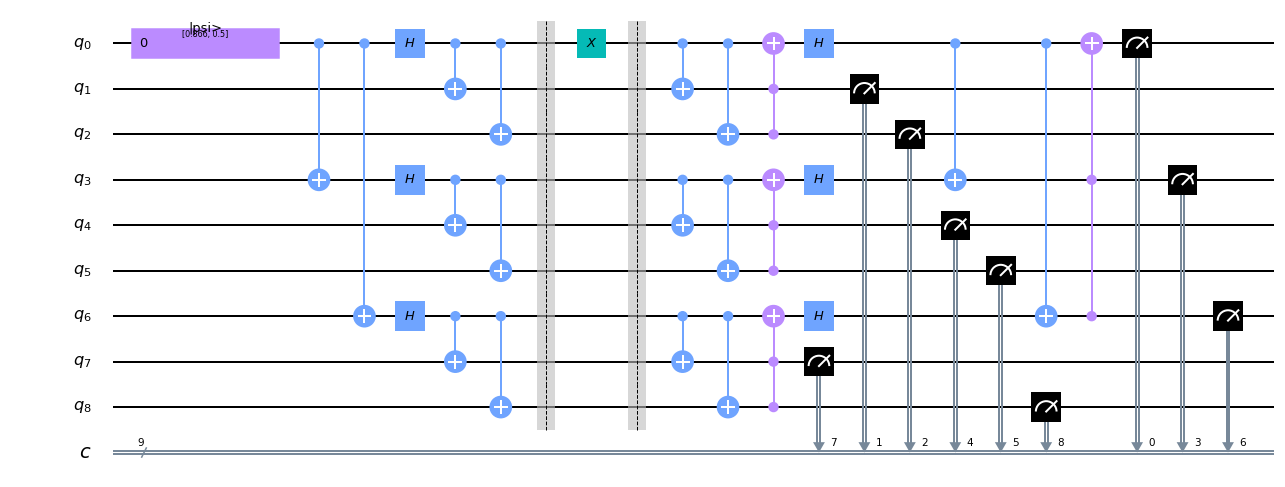

In [5]:
# Declaramos un circuito en que probaremos este código
qc=QuantumCircuit(9,9)
#Hay que inicializar el estado psi, uno no trivial
initial_state=[sqrt(0.75),sqrt(1-0.75)]
qc.initialize(initial_state, 0)
shor_amp(qc)
qc.draw(output='mpl')

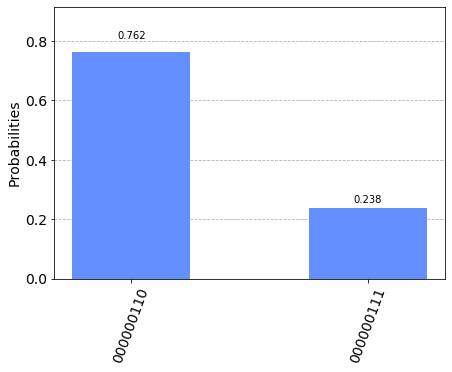

In [6]:
qasm=Aer.get_backend('qasm_simulator')
job=execute(qc,qasm,shots=1000)
result=job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

#### Analizando resultados:
Las probabilidades anteriores sugieren que el estado al final del circuito es (sosteniendo la notación de Qiskit) el 
$$ |00000011\rangle \otimes |\psi\rangle$$
Esto muestra que el código corrige el error de amplitud generado por aplicar la compuerta $\sigma_x$ al qubit $q_0$. Además de lo anterior, la aparición de dos ceros en $|00000011\rangle$ diagnostica el error de amplitud.

## Error de fase
Hacemos el código de shor en el caso en donde $E$ implementa un error de fase, se aplica una compuerta $\sigma_z$. Redefinimos el circuito y le aplicamos el código.

In [7]:
def shor_phase(circ):
    circ.cx(0,3)
    circ.cx(0,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.barrier()
    circ.z(0)
    circ.barrier()
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.ccx(1,2,0)
    circ.ccx(4,5,3)
    circ.ccx(7,8,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,3)
    circ.cx(0,6)
    circ.ccx(3,6,0)
    circ.measure(range(0,9),range(0,9))

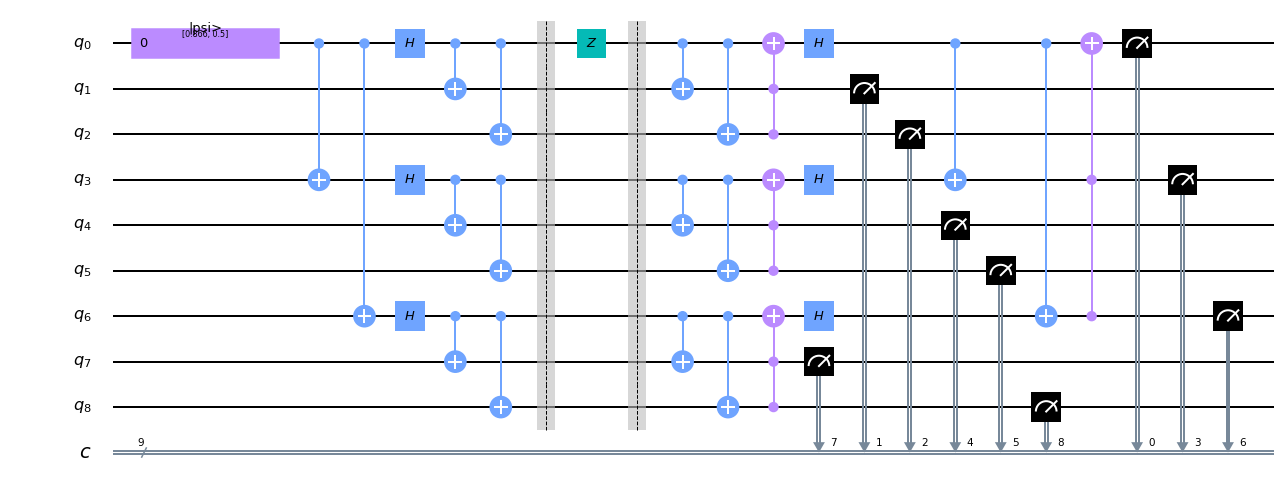

In [8]:
qc2=QuantumCircuit(9,9)
#Hay que inicializar el estado psi, uno no trivial
initial_state=[sqrt(0.75),sqrt(1-0.75)]
qc2.initialize(initial_state, 0)
shor_phase(qc2)
qc2.draw(output='mpl')


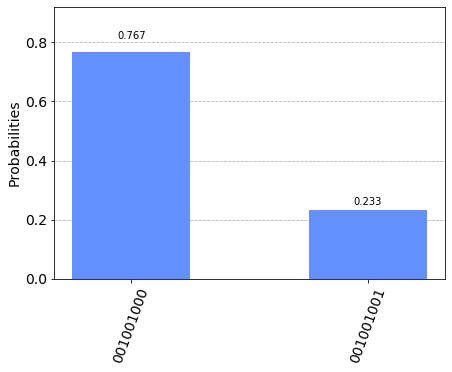

In [9]:
qasm=Aer.get_backend('qasm_simulator')
job=execute(qc2,qasm,shots=1000)
result=job.result()
counts = result.get_counts(qc2)
plot_histogram(counts)

#### Analizando resultados:
Las probabilidades anteriores sugieren que el estado al final del circuito es el 
$$|00100100\rangle \otimes |\psi\rangle$$
Esto muestra que el código corrige el error de fase generado por aplicar la compuerta $\sigma_z$ al qubit $q_0$. Además de lo anterior, la aparición de dos ceros en $|00100100\rangle$ diagnostica el error de fase.

## Error de ambos tipos
Hacemos el código de shor en el caso en donde $E$ implementa un error de fase, se aplica una compuerta $\sigma_z$ y posteriormente $\sigma_x$. Nuevamente redefinimos el circuito y le aplicamos el código.

In [10]:
def shor(circ):
    circ.cx(0,3)
    circ.cx(0,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.barrier()
    circ.z(0)
    circ.x(0)
    circ.barrier()
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.ccx(1,2,0)
    circ.ccx(4,5,3)
    circ.ccx(7,8,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,3)
    circ.cx(0,6)
    circ.ccx(3,6,0)
    circ.measure(range(0,9),range(0,9))

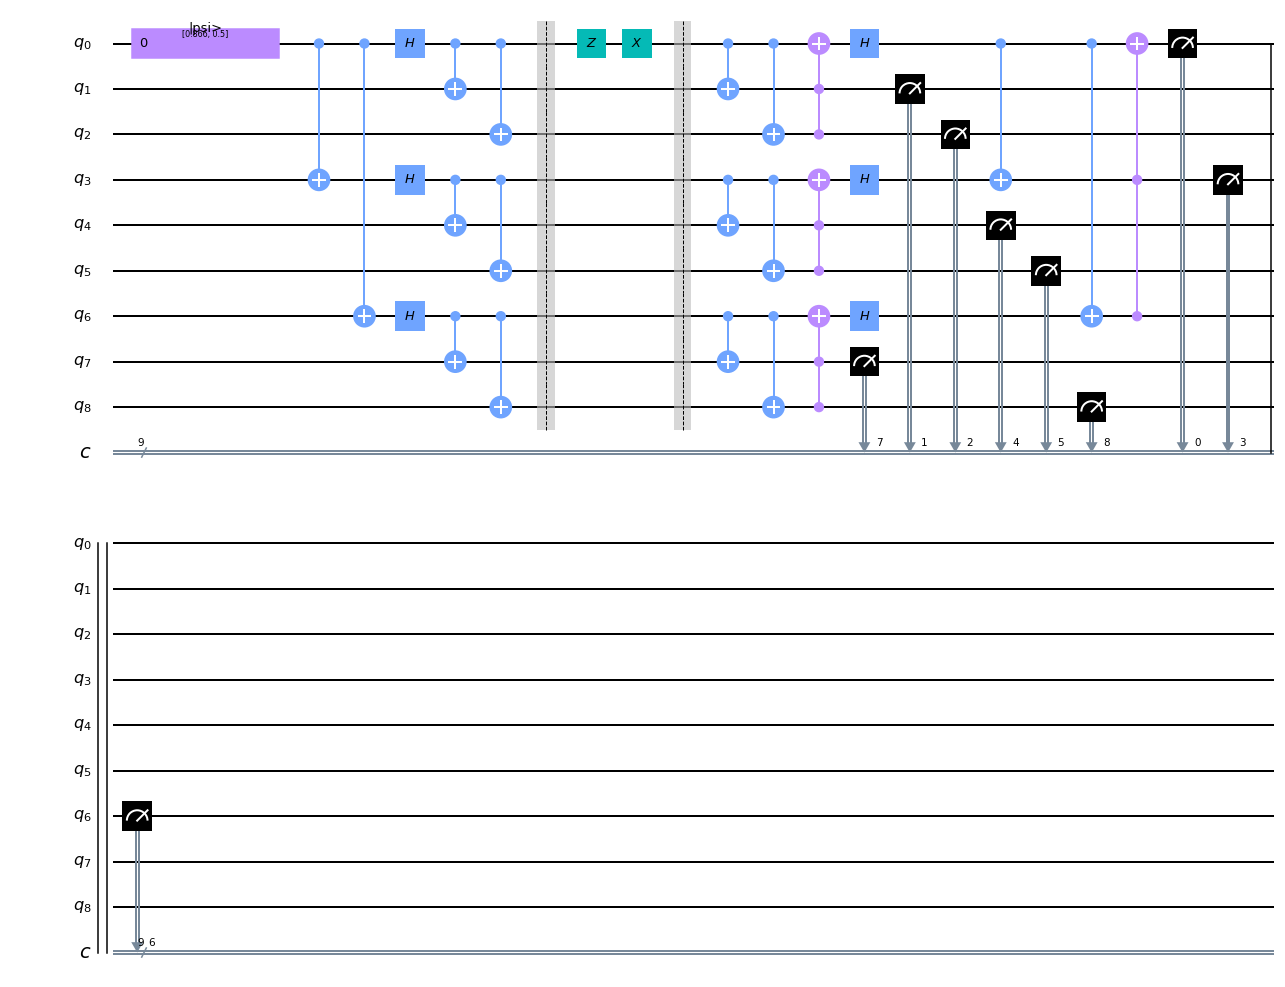

In [11]:
qc3=QuantumCircuit(9,9)
#Hay que inicializar el estado psi, uno no trivial
initial_state=[sqrt(0.75),sqrt(1-0.75)]
qc3.initialize(initial_state, 0)
shor(qc3)
qc3.draw(output='mpl')

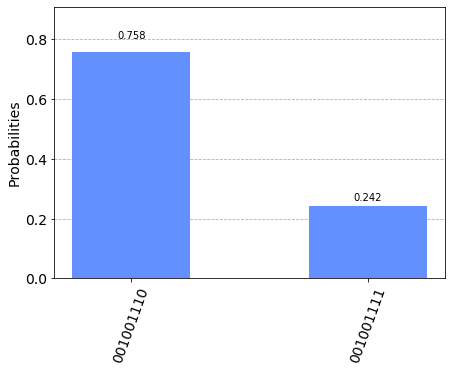

In [12]:
qasm=Aer.get_backend('qasm_simulator')
job=execute(qc3,qasm,shots=1000)
result=job.result()
counts = result.get_counts(qc3)
plot_histogram(counts)

#### Analizando resultados:
Las probabilidades anteriores sugieren que el estado al final del circuito es el 
$$  |00100111\rangle \otimes |\psi\rangle $$
Esto muestra que el código corrige los errores de fase y amplitud que se generaron al aplicar la secuencia $\sigma_z,\sigma_x$ al primer qubit. Notemos además que los qubits $q_1,q_2$ que anteriormente diagnosticaban el error de amplitud están en $|1\rangle$, al igual que los qubits $q_3, q_6$ que anteriormente diagnosticaban el error de fase. Esto indica que se encontraron ambos errores en el canal $E$.

## Corriendo sin errores
Para mostrar que los qubits en $|1\rangle$ activados indican la presencia de alguno o ambos errores, hacemos una implementación en la que el canal $E$ no tiene error alguno.

In [13]:
def shor_clean(circ):
    circ.cx(0,3)
    circ.cx(0,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.barrier()
    circ.barrier()
    circ.cx(0,1)
    circ.cx(3,4)
    circ.cx(6,7)
    circ.cx(0,2)
    circ.cx(3,5)
    circ.cx(6,8)
    circ.ccx(1,2,0)
    circ.ccx(4,5,3)
    circ.ccx(7,8,6)
    circ.h(0)
    circ.h(3)
    circ.h(6)
    circ.cx(0,3)
    circ.cx(0,6)
    circ.ccx(3,6,0)
    circ.measure(range(0,9),range(0,9))

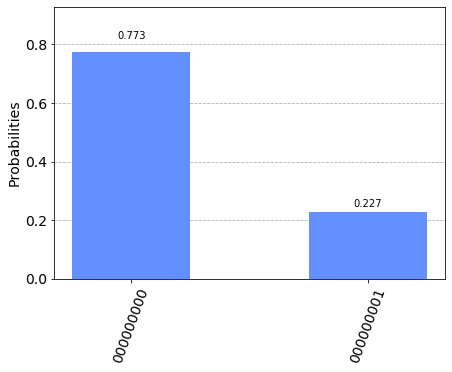

In [14]:
qc4=QuantumCircuit(9,9)
#Hay que inicializar el estado psi, uno no trivial
initial_state=[sqrt(0.75),sqrt(1-0.75)]
qc4.initialize(initial_state, 0)
shor_clean(qc4)
qc4.draw(output='mpl')
qasm=Aer.get_backend('qasm_simulator')
job=execute(qc4,qasm,shots=1000)
result=job.result()
counts = result.get_counts(qc4)
plot_histogram(counts)

Hemos corroborado que los qubits que se "encienden" indican errores de amplitud o fase, mostrando que el código de Shor diagnostica y corrige ambos tipos de errores. 